# Homework 2

Daniil Sherki

# Problem statement

Given the following mole fractions of a gas at 300 psia and 130°F:

| Component | $y_i$ |
|-----------|-------|
| $C_1$     | 0.60  |
| $C_2$     | 0.17  |
| $C_3$     | 0.13  |
| $n-C_4$   | 0.06  |
| $n-C_5$   | 0.04  |

Assuming real gas behavior, calculate:
    a. Z-Factor (Papay’s Method)
    b. Z-Factor (Hall and Yarborough Method)
    c. Compare the values of gas density based on both computed Z-factors
    d. Compare the values of gas formation volume factor based on both computed Z-
factors

# Solution

## Import libraries and initial data

In [207]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [208]:
# conversion functions to convert one measurement systems into other

class Conversion():
    def __init__(self):
        pass

    def R2F(self, x):
        '''
        ** Temperature **
        Rankine degrees into Fahrenheit degrees
        :param x: float; // R degress
        :return: float. // F degrees
        '''
        return x - 459.67

    def F2R(self, x):
        '''
        ** Temperature **
        Fahrenheit degrees into Rankine degrees
        :param x: float; // F degress
        :return: float. // R degrees
        '''
        return x + 459.67

    def psia2bar(self, x):
        '''
        ** Pressure **
        pisa into bar
        1 psi = 0.0689475729 bar
        :param x: float; // psia
        :return: float. // bar
        '''
        return 0.0689475729 * x

    def bar2psia(self, x):
        '''
        ** Pressure **
        bar into psia
        1 bar = 14.503773773 psi
        :param x: float; // bar
        :return: float. // psia
        '''
        return 14.503773773 * x

c = Conversion()

In [209]:
df = pd.DataFrame({'Component':['C1', 'C2', 'C3', 'nC4', 'nC5'],
                   'y_i': [0.6, 0.17, 0.13, 0.06, 0.04]})
df

,Component,y_i
0,C1,0.60
1,C2,0.17
2,C3,0.13
3,nC4,0.06
4,nC5,0.04


## 1. Z-factor | Papay's Method

Papay's method will be found in [this article](https://www.sciencedirect.com/topics/engineering/z-factor) and can be represent as:

$$ Z = 1 - \frac{3.53 p_{\mathrm{pr}}}{10^{0.9813 T_{\mathrm{pr}}}} + \frac{0.274 p^2_{\mathrm{pr}}}{10^{0.8157 T_{\mathrm{pr}}}}, $$

where

 * $p_{\mathrm{pr}}$ is a pseudoreduced pressure, dimensionless;
 * $T_{\mathrm{pr}}$ is a pseudoreduced temperature, dimensionless.

$$ p_{\mathrm{pr}} = \frac{p}{p_{\mathrm{pc}}} $$

$$ T_{\mathrm{pr}} = \frac{T}{T_\mathrm{pc}}$$

* $p$ - system pressure, psia
* $T$ - system temperature, °R
* $p_{pc}$ -  pseudocritical pressure, psia
* $T_{pc}$ - pseudocritical temperature, °R

$$ p_{\mathrm{pc}} = \sum_i y_i p_{ci}$$

$$ T_{\mathrm{pc}} = \sum_i y_i T_{ci}$$

Let's modify our orgignal data with adding critical temperatures and pressure for each substances.

In [210]:
df = pd.DataFrame({'Component': ['C1', 'C2', 'C3', 'nC4', 'nC5'],
                   'y_i': [0.6, 0.17, 0.13, 0.06, 0.04],
                   'T_c_R': [343.33, 549.92, 666.06, 765.62, 845.60],
                   'p_c_psia': [666.4, 706.5, 616.4, 550.6, 488.6]})
df['y_ixT_c'] = df['y_i'] * df['T_c_R']
df['y_ixp_c'] = df['y_i'] * df['p_c_psia']
df

,Component,y_i,T_c_R,p_c_psia,y_ixT_c,y_ixp_c
0,C1,0.60,343.33,666.4,205.9980,399.840
1,C2,0.17,549.92,706.5,93.4864,120.105
2,C3,0.13,666.06,616.4,86.5878,80.132
3,nC4,0.06,765.62,550.6,45.9372,33.036
4,nC5,0.04,845.60,488.6,33.8240,19.544


In [211]:
p_pc = df['y_ixp_c'].sum()
T_pc = df['y_ixT_c'].sum()
print(f'Pseudocritical pressure equals to {round(p_pc,3)} psia')
print(f'Pseudocritical temperature equals to {round(T_pc,3)} R degrees')

Pseudocritical pressure equals to 652.657 psia
Pseudocritical temperature equals to 465.833 R degrees


In [212]:
def z_factor_papay(p, T, p_pc = p_pc, T_pc = T_pc):
    '''
    Calculation of Z-factor using Papay's method
    :param p: float; // psia
    :param T: float; // R degrees
    :param p_pc: float; // psia
    :param T_pc: float; // R degrees
    :return: float. // z-factor
    '''
    p_pr = p/p_pc
    T_pr = T/T_pc
    z = 1 - 3.53 * p_pr / (np.power(10, 0.9813*T_pr)) + 0.274 * np.power(p_pr, 2) / (np.power(10, 0.8157*T_pr))
    return z

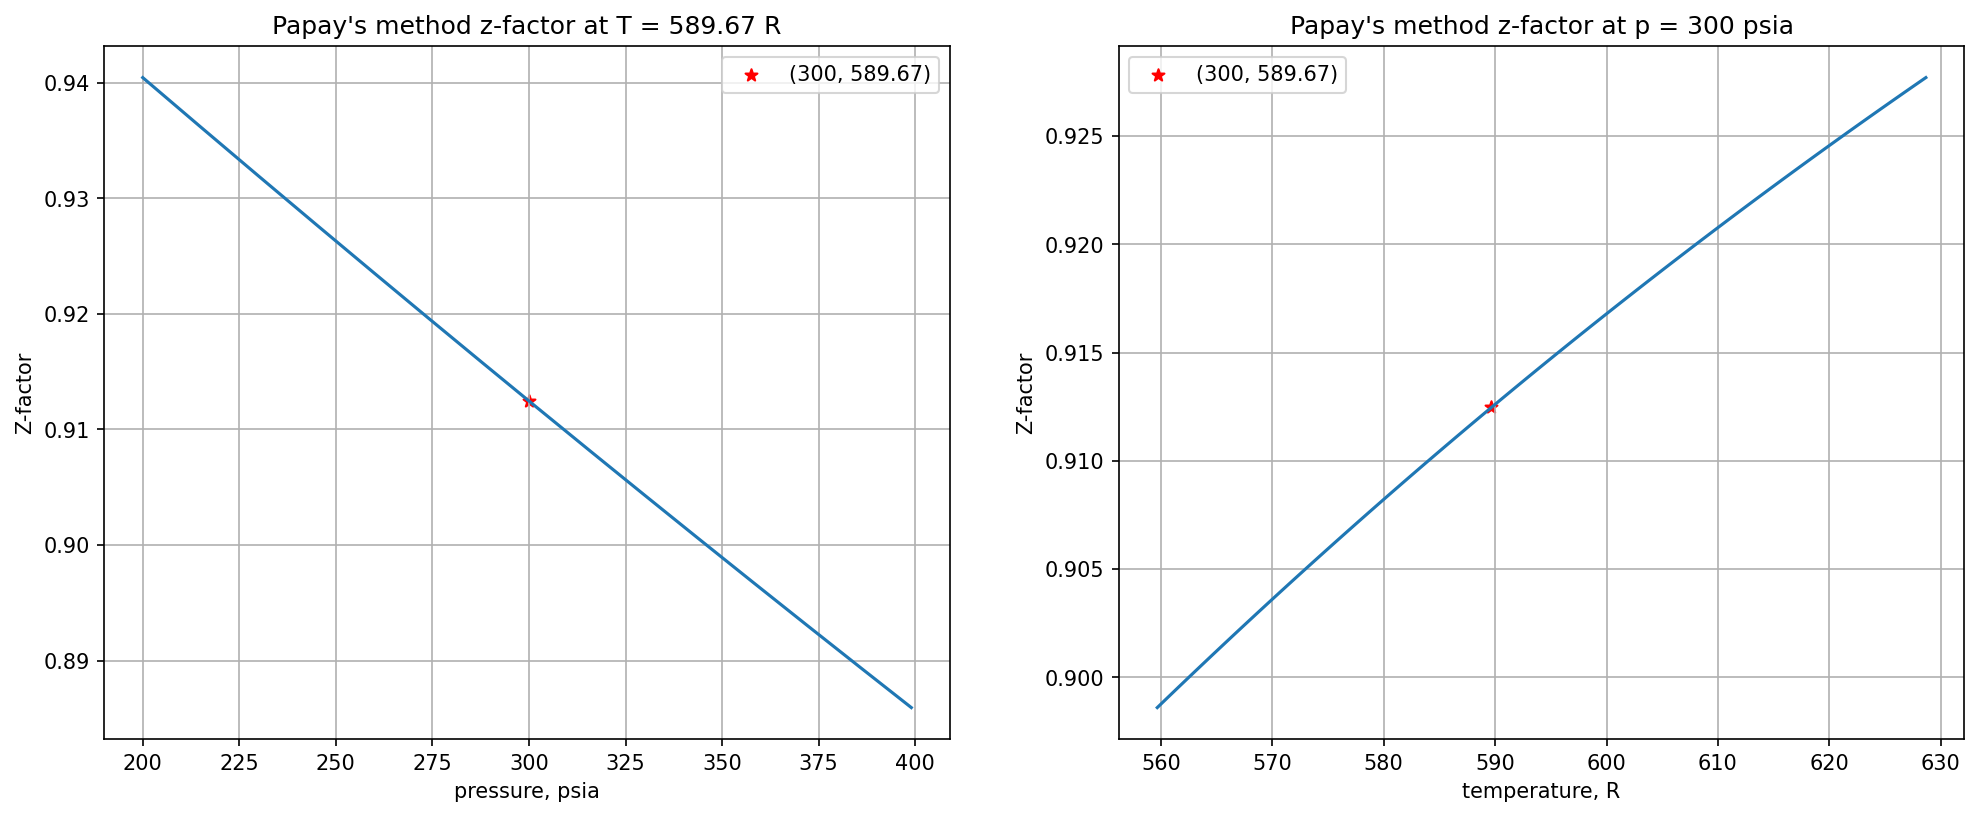

For p = 300 psia and T = 589.67 Z-factor calculated using Papay's method equals to 0.912


In [213]:
p = 300
T = c.F2R(130)
z_papay = z_factor_papay(p, T)

p_arr = np.arange(200, 400, 1)
T_arr = c.F2R(np.arange(100, 170, 1))

plt.figure(figsize=(16,6), dpi=150)

plt.subplot(1,2,1)
plt.plot(p_arr, z_factor_papay(p_arr, T))
plt.scatter(p, z_papay, color='red', marker='*',
            label = f'({round(p,2)}, {round(T,2)})')
plt.title(f"Papay's method z-factor at T = {round(T,2)} R")
plt.xlabel('pressure, psia')
plt.ylabel('Z-factor')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(T_arr, z_factor_papay(p, T_arr))
plt.scatter(T, z_papay, color='red', marker='*',
            label =f'({round(p,2)}, {round(T,2)})')
plt.title(f"Papay's method z-factor at p = {round(p,2)} psia")
plt.xlabel('temperature, R')
plt.ylabel('Z-factor')
plt.grid(True)
plt.legend()
plt.show()

print(f"For p = {round(p,2)} psia and T = {round(T,2)} Z-factor calculated using Papay's method equals to {round(z_papay, 3)}")

## 2. Z-Factor | Hall and Yarborough Method

$$Z = \left[\frac{0.06125 t p_{pr}}{Y} \right] \exp{\left[ -1.2 (1-t)^2 \right]}$$

where
* $p_{pr}$ -  pseudoreduced pressure
* $t$ - reciprocal of the pseudoreduced temperature (ie, $T_{pc}/T$)
* $Y$ - the reduced density, which can be obtained as the solution of the following equation:

$$F(Y) = X_1 + \frac{Y + Y^2 + Y^3 - Y^4}{1-Y} - X_2 \cdot Y^2 + X_3 \cdot Y^{X_4} = 0$$

where

$$X_1 = -0.06125 p_{pr} t \exp{\left[ -1.2 (1-t)^2 \right]}$$

$$X_2 = 14.76t - 9.76 t^2 + 4.58 t^3$$

$$X_3 = 90.71t - 242.2 t^2 + 42.4 t^3$$

$$X_4 = 2.18 + 2.82t$$

In [214]:
def z_factor_hall_yarborough(p, T, p_pc = p_pc, T_pc = T_pc, disp = True):
    '''
    Calculation of Z-factor using Hall and Yarborough method
    :param p: float; // psia
    :param T: float; // R degrees
    :param p_pc: float; // psia
    :param T_pc: float; // R degrees
    :param disp: Boolean; // need to disp NR method results or not
    :return: float. // z-factor
    '''
    t = T_pc/T
    p_pr = p/p_pc

    def f_reduced_density(Y, p = p, T = T, p_pc = p_pc, T_pc = T_pc):
        '''
        Reduced density calculation F(Y) = 0
        :param Y: float; // Y
        :param p: float; // psia
        :param T: float; // R degrees
        :param p_pc: float; // psia
        :param T_pc: float; // R degrees
        :return: float. // F(Y)
        '''
        t = T_pc/T
        p_pr = p/p_pc
        X1 = -0.06125 * p_pr * t * np.exp(-1.2 * (1-t)**2)
        X2 = 14.76 * t - 9.76 * (t**2) + 4.58 * (t**3)
        X3 = 90.71 * t - 242.2*(t**2) + 42.4 * (t**3)
        X4 = 2.18 + 2.82 * t
        return X1 + (Y + Y**2 + Y**3 + Y**4)/(1-Y) - X2*(Y**2) + X3 * Y**(X4)

    def grad_f_reduced_density(Y, p = p, T = T, p_pc = p_pc, T_pc = T_pc):
        '''
        Derivation of Reduced density fuction F'(Y) = 0
        :param Y: float; // Y
        :param p: float; // psia
        :param T: float; // R degrees
        :param p_pc: float; // psia
        :param T_pc: float; // R degrees
        :return: float; // dF(Y)
        '''
        t = T_pc/T
        # p_pr = p/p_pc
        # X1 = -0.06125 * p_pr * t * np.exp(-1.2 * (1-t)**2)
        X2 = 14.76 * t - 9.76 * (t**2) + 4.58 * (t**3)
        X3 = 90.71 * t - 242.2*(t**2) + 42.4 * (t**3)
        X4 = 2.18 + 2.82 * t
        return (1 + 4*Y + 4*(Y**2) - 4*(Y**3) + Y**4)/((1-Y)**4) - 2*X2*Y + X3 * X4 * (Y**(X4-1))

    def Newton_Raphson_method(Y0 = 0.0125 * p_pr * t * np.exp(-1.2 * (1-t)**2), func = f_reduced_density, grad_func = grad_f_reduced_density):
        '''
        Newton-Raphson method to find zero value of reduced density equation
        F(Y) = 0
        :param Y0: float; // initial point
        :param func: function; // function, which we want to make equal zero
        :param grad_func: function; // gradient function
        :return: (float, float). // value function and Y*
        '''
        Y = Y0
        Y_prev = 0
        while abs(Y - Y_prev) > 1e-12:
            Y_prev = Y
            Y = Y_prev - func(Y)/grad_func(Y)
        return func(Y), Y

    f_star, Y = Newton_Raphson_method()

    if disp:
        print(f'F(Y) minimize with F value = {f_star} and with Y value = {round(Y,4)}')
    return 0.06125 * t * p_pr / Y * np.exp(-1.2 * (1-t)**2)

In [215]:
z_hy = z_factor_hall_yarborough(p, T)
print(f"For p = {round(p,2)} psia and T = {round(T,2)} Z-factor calculated using  Hall and Yarborough Method equals to {round(z_hy, 3)}")

F(Y) minimize with F value = -7.135548696238312e-14 and with Y value = 0.0246
For p = 300 psia and T = 589.67 Z-factor calculated using  Hall and Yarborough Method equals to 0.858


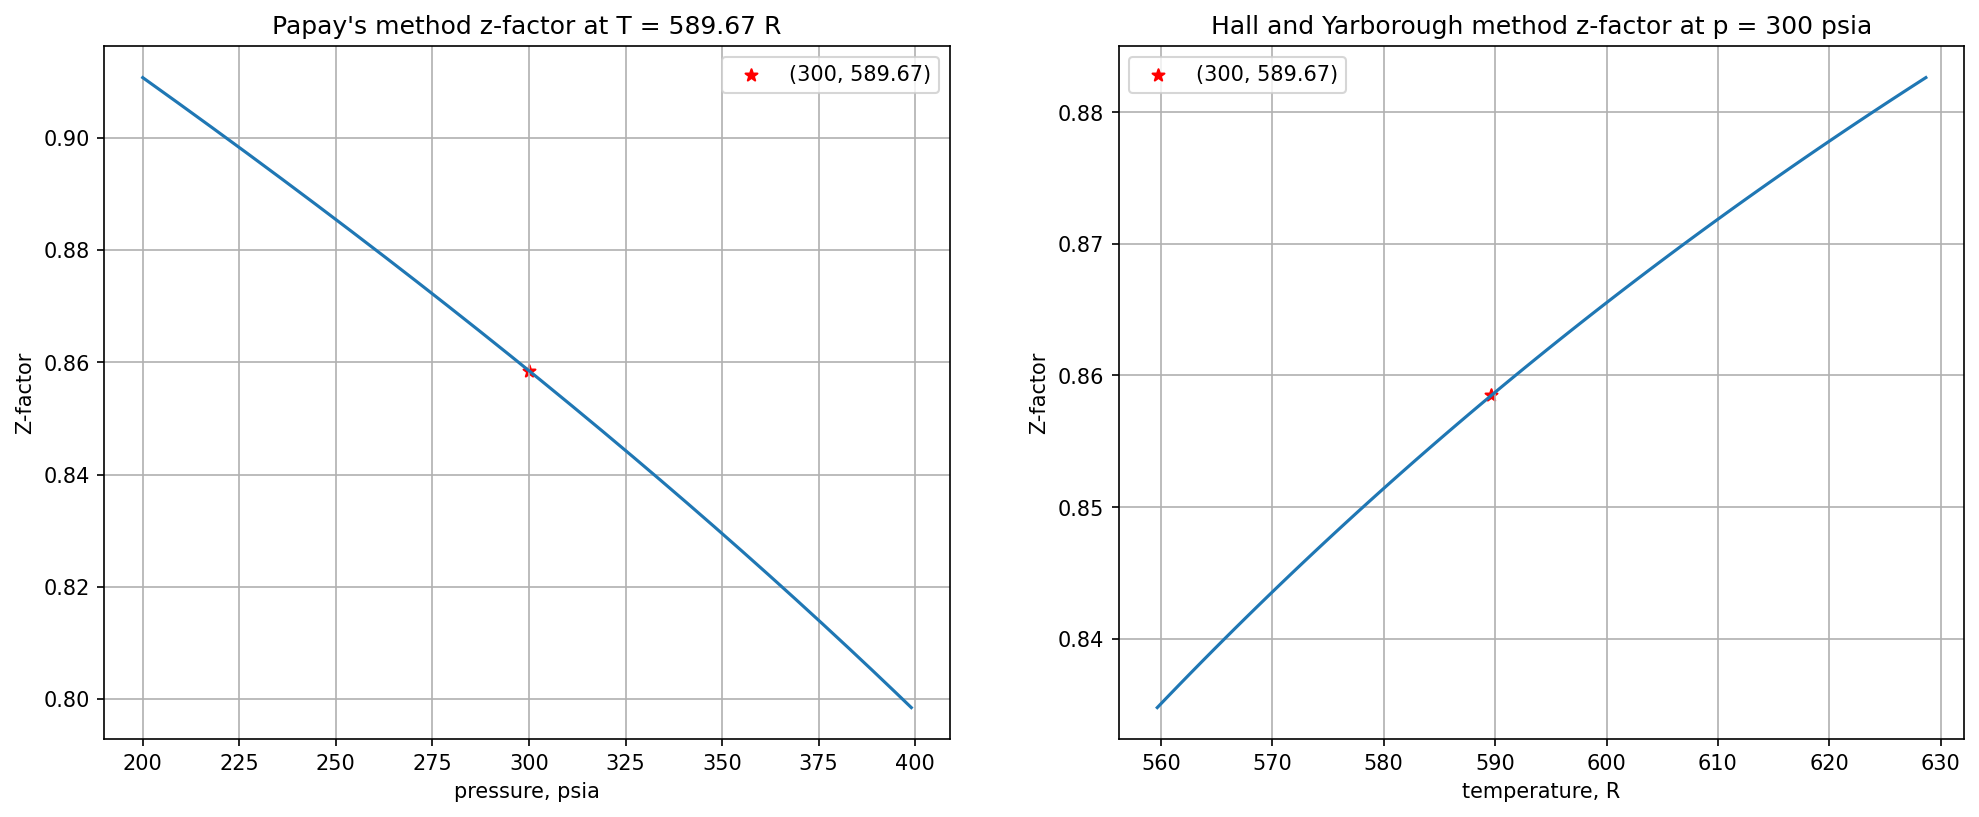

For p = 300 psia and T = 589.67 Z-factor calculated using Hall and Yarborough method equals to 0.858


In [216]:
z_hy_arr_p = []
z_hy_arr_T = []

for i in range(len(p_arr)):
    z_hy_arr_p.append(z_factor_hall_yarborough(p_arr[i], T, disp=False))
for i in range(len(T_arr)):
    z_hy_arr_T.append(z_factor_hall_yarborough(p, T_arr[i], disp=False))

plt.figure(figsize=(16,6), dpi=150)

plt.subplot(1,2,1)
plt.plot(p_arr, z_hy_arr_p)
plt.scatter(p, z_hy, color='red', marker='*',
            label = f'({round(p,2)}, {round(T,2)})')
plt.title(f"Papay's method z-factor at T = {round(T,2)} R")
plt.xlabel('pressure, psia')
plt.ylabel('Z-factor')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(T_arr, z_hy_arr_T)
plt.scatter(T, z_hy, color='red', marker='*',
            label =f'({round(p,2)}, {round(T,2)})')
plt.title(f"Hall and Yarborough method z-factor at p = {round(p,2)} psia")
plt.xlabel('temperature, R')
plt.ylabel('Z-factor')
plt.grid(True)
plt.legend()
plt.show()

print(f"For p = {round(p,2)} psia and T = {round(T,2)} Z-factor calculated using Hall and Yarborough method equals to {round(z_hy, 3)}")

## Two methods comparsion

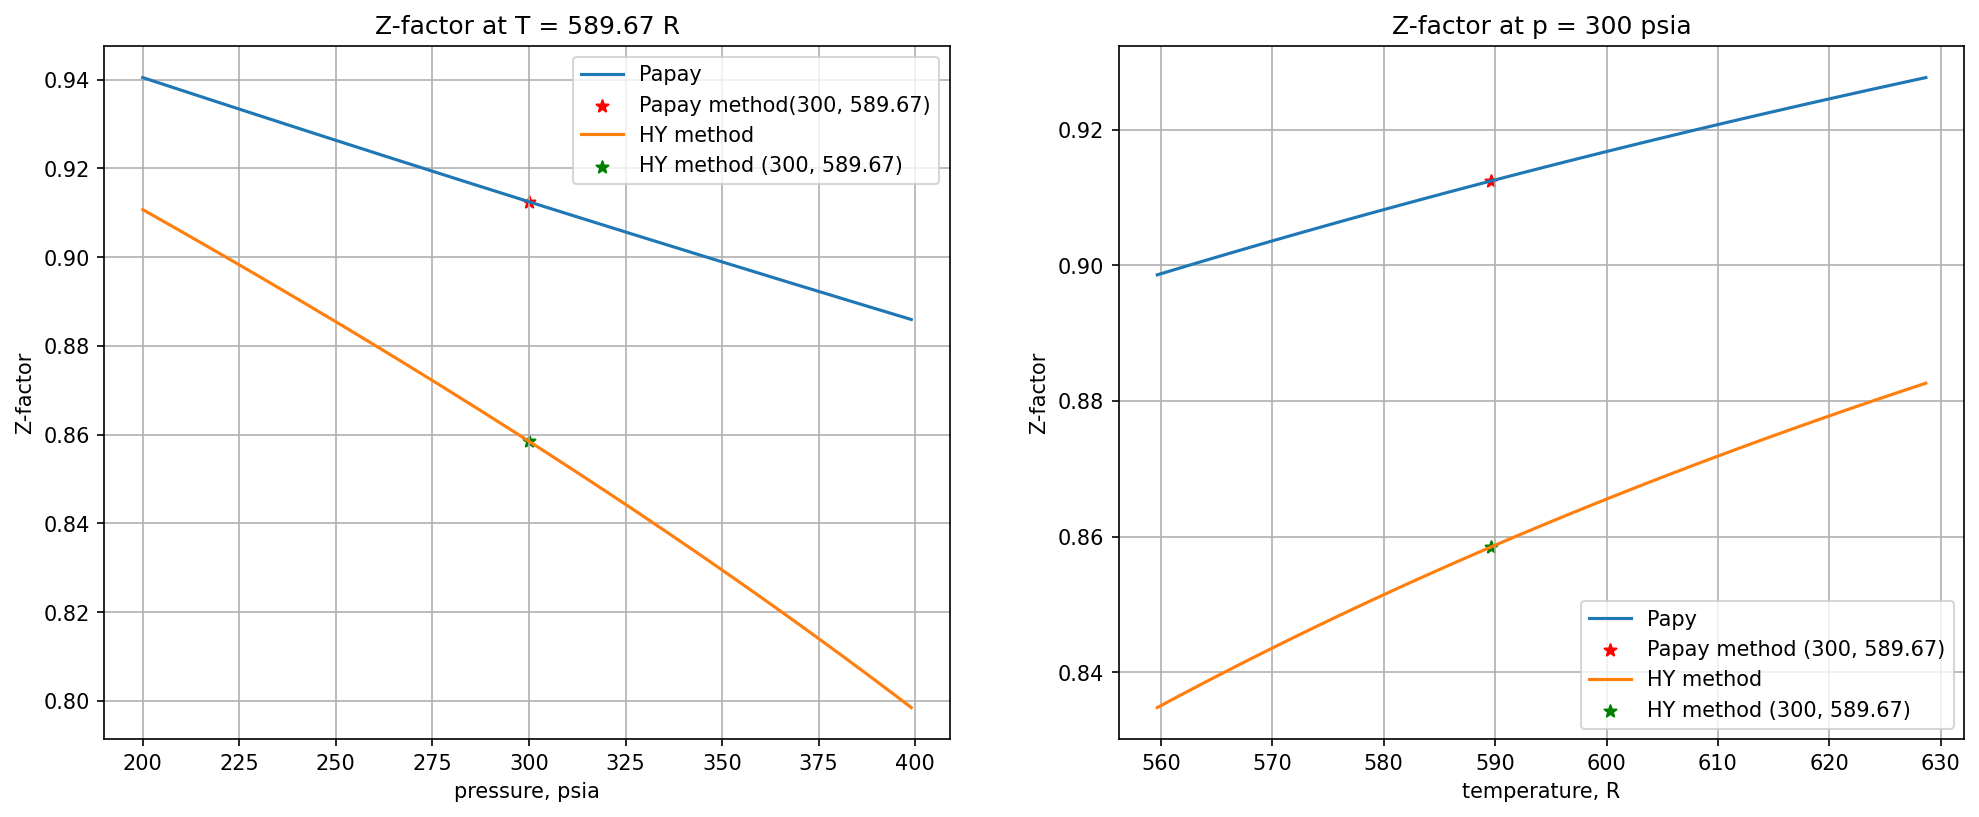

The diffirence between the method 5.91%


In [217]:
plt.figure(figsize=(16,6), dpi=150)

plt.subplot(1,2,1)
plt.plot(p_arr, z_factor_papay(p_arr, T), label='Papay')
plt.scatter(p, z_papay, color='red', marker='*',
            label = f'Papay method({round(p,2)}, {round(T,2)})')
plt.plot(p_arr, z_hy_arr_p, label = 'HY method')
plt.scatter(p, z_hy, color='green', marker='*',
            label = f'HY method ({round(p,2)}, {round(T,2)})')
plt.title(f"Z-factor at T = {round(T,2)} R")
plt.xlabel('pressure, psia')
plt.ylabel('Z-factor')
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.plot(T_arr, z_factor_papay(p, T_arr), label='Papy')
plt.scatter(T, z_papay, color='red', marker='*',
            label =f'Papay method ({round(p,2)}, {round(T,2)})')
plt.plot(T_arr, z_hy_arr_T, label='HY method')
plt.scatter(T, z_hy, color='green', marker='*',
            label =f'HY method ({round(p,2)}, {round(T,2)})')
plt.title(f"Z-factor at p = {round(p,2)} psia")
plt.xlabel('temperature, R')
plt.ylabel('Z-factor')
plt.grid(True)
plt.legend()
plt.show()
print(f"The diffirence between the method {abs(z_papay - z_hy)/z_papay:.2%}")

## 3. Compare the values of gas density based on both computed Z-factors

$$ pV = Z \frac{m}{M_a} RT$$

* $m$ - weight of gas, lb;
* $M_a$ - apperent molecular weight, lb/lb-mol

$$ M_a = \sum_i y_i M_i $$

$$ \rho_g = \frac{pM_a}{ZRT} $$

$ \rho_g $ - density, $lb/ft^3$


In [218]:
df['M_i'] = [16.04, 30.1, 44.1, 58.1, 72.2]
df['y_ixM_i'] = df['y_i'] * df['M_i']
M_a = df['y_ixM_i'].sum()
print(f'M_a = {round(M_a, 2)} lb/lb-mol')
df

M_a = 26.85 lb/lb-mol


,Component,y_i,T_c_R,p_c_psia,y_ixT_c,y_ixp_c,M_i,y_ixM_i
0,C1,0.60,343.33,666.4,205.9980,399.840,16.04,9.624
1,C2,0.17,549.92,706.5,93.4864,120.105,30.10,5.117
2,C3,0.13,666.06,616.4,86.5878,80.132,44.10,5.733
3,nC4,0.06,765.62,550.6,45.9372,33.036,58.10,3.486
4,nC5,0.04,845.60,488.6,33.8240,19.544,72.20,2.888


In [219]:
R = 10.73
rho_papay = p * M_a / (z_papay * R * T)
rho_hy = p * M_a / (z_hy * R * T)

print(f"Density with Papay's method z-factor is {round(rho_papay, 3)} lb/ft3")
print(f"Density with Hall and Yarborough methos z-factor is {round(rho_hy, 3)} lb/ft3 ")
print(f"The diffirence between the method {abs(rho_papay - rho_hy)/rho_papay:.2%}")

Density with Papay's method z-factor is 1.395 lb/ft3
Density with Hall and Yarborough methos z-factor is 1.483 lb/ft3 
The diffirence between the method 6.29%


## 4. Compare the values of gas formation volume factor based on both computed Z- factors

Assuming that the standard conditions are represented by $p_{sc} = 14.7$ psia and $T_{sc} = 520$, the preceding expression can be reduced to the following relationship:

$$ B_g  = 0.02827 \frac{ZT}{p}$$

In [220]:
B_papay = 0.02827 * z_papay * T/p
B_hy = 0.02827 * z_hy * T/p

print(f"Gas FVF with Papay's method z-factor is {round(B_papay, 3)} ft3/scf")
print(f"Gas FVF with Hall and Yarborough methos z-factor is {round(B_hy, 3)} ft3/scf ")
print(f"The diffirence between the method {abs(B_papay - B_hy)/B_papay:.2%}")

Gas FVF with Papay's method z-factor is 0.051 ft3/scf
Gas FVF with Hall and Yarborough methos z-factor is 0.048 ft3/scf 
The diffirence between the method 5.91%


## General results

Pivot table for observations

In [221]:
pt = pd.DataFrame({'Methods': ['Papay', 'Hall and Yarborough', 'Difference, %'],
                   'Z-factor': [z_papay, z_hy, abs(z_papay - z_hy)/z_papay * 100],
                   'Density, lb/ft3': [rho_papay, rho_hy, abs(rho_papay - rho_hy)/rho_papay * 100],
                   'Gas FVF, ft3/scf': [B_papay, B_hy, abs(B_papay - B_hy)/B_papay * 100]})

pt

,Methods,Z-factor,"Density, lb/ft3","Gas FVF, ft3/scf"
0,Papay,0.912465,1.395109,0.050703
1,Hall and Yarborough,0.858493,1.482817,0.047704
2,"Difference, %",5.914960,6.286823,5.914960


According to our course textbook

> Hall and Yarborough pointed out that the method is not recommended
for application if the pseudoreduced temperature is less than 1.

In [222]:
print(f'Pseudoreduced temperature equal to {T/T_pc :.2f} for our task')

Pseudoreduced temperature equal to 1.27 for our task


Thus, Hall and Yarborough method can be counted as applicable for this case.

We can observe that different give us significantly different results. Z-factor difference between 2 methods equal to 5.91%, and it is a reason, why das FVF differs for both methods and why density differs on 6.3%.